# Spectrogram Display

In [2]:
import os
import sys

# path

In [3]:
print(os.getcwd())

C:\Users\Administrator\Desktop\HI2\HI


In [4]:
training_data_kok14_galfa = os.path.join(os.getcwd(),"data", "other", "training_data_kok14_galfa.pickle")

# Libraries

In [5]:

from __future__ import print_function, division
from astropy.io          import fits
from astropy             import units as u
from astropy.coordinates import SkyCoord

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from collections import OrderedDict
import math
import scipy

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets
from torch.optim.lr_scheduler import LambdaLR, StepLR, MultiStepLR, ExponentialLR
import os
import argparse

import glob
import pickle

C:\Users\Administrator\.conda\envs\torch1.12.1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data preparation

In [6]:
data = pickle.load(open(training_data_kok14_galfa, 'rb'))

# training data
X_train = data['X_train']
Y_train = data['Y_train']
# Observed test data
X_test = data['X_test']
Y_test = data['Y_test']

In [7]:
print("x_train = ", X_train.shape)
print("Y_train = ", Y_train.shape)
print("X_test = ", X_test.shape)
print("Y_test = ", Y_test.shape)

x_train =  (38781, 414)
Y_train =  (38781, 2)
X_test =  (58, 414)
Y_test =  (58, 2)


## Split train, validation and testing set from X_train and Y_train.

In [8]:
# set aside 20% of train and test data for evaluation
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [9]:
print("x_train=",x_train.shape, ", y_train=", y_train.shape)
print("x_val=",x_val.shape, ", y_val=", y_val.shape)
print("x_test=",x_test.shape, ", y_test=", y_test.shape)

x_train= (23268, 414) , y_train= (23268, 2)
x_val= (7756, 414) , y_val= (7756, 2)
x_test= (7757, 414) , y_test= (7757, 2)


# Plot few spectra gram

In [10]:
#https://stackoverflow.com/questions/70397729/how-to-convert-a-matplotlib-spectrogram-image-into-a-torch-tensor?noredirect=1&lq=1

(33, 351)


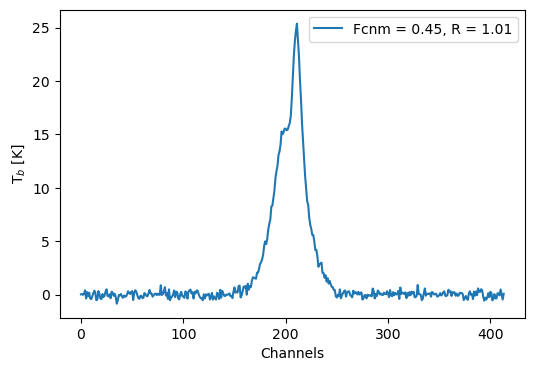

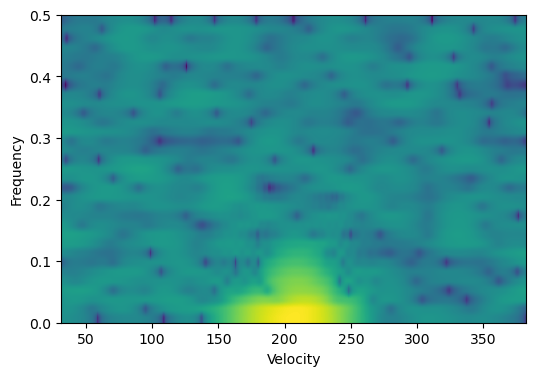

In [11]:
x = X_train[0, :]
plt.figure(figsize=(6,4))
plt.plot(x, label=f'Fcnm = {round(Y_train[20000,0], 2)}, R = {round(Y_train[0,1], 2)}')
plt.xlabel('Channels')
plt.ylabel('T$_b$ [K]')
plt.legend()
#plt.axis('off')

plt.figure(figsize=(6,4))
plt.xlabel("Velocity")
plt.ylabel("Frequency")
ws = 64
spectrum, freqs,t,im = plt.specgram(x, Fs=1,NFFT=ws, noverlap=ws-1)
torch_tensor = torch.from_numpy(spectrum)
print(spectrum.shape)
#plt.show(10*np.log10(torch_tensor))
plt.show()

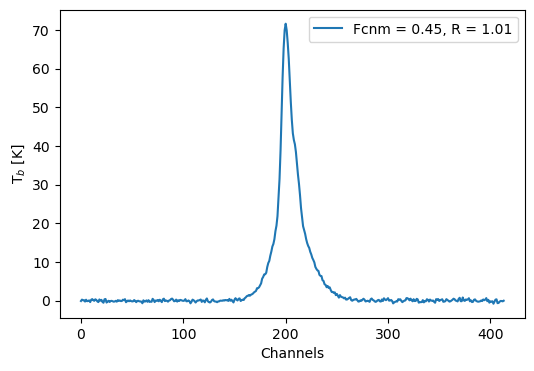

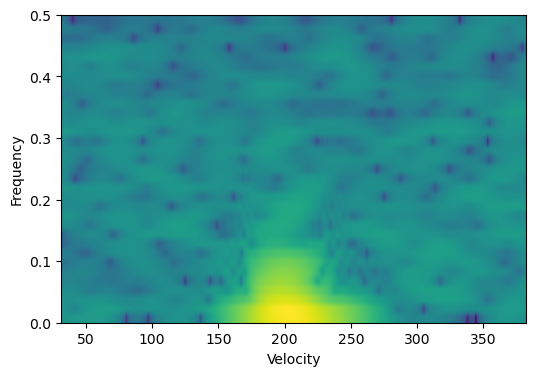

In [12]:
x = X_train[1000, :]

plt.figure(figsize=(6,4))
plt.plot(x, label=f'Fcnm = {round(Y_train[20000,0], 2)}, R = {round(Y_train[0,1], 2)}')
plt.xlabel('Channels')
plt.ylabel('T$_b$ [K]')
plt.legend()
#plt.axis('off')

plt.figure(figsize=(6,4))
plt.xlabel("Velocity")
plt.ylabel("Frequency")
ws = 64
spectrum, freqs,t,im = plt.specgram(x, Fs=1, NFFT = ws, noverlap=ws-1)
torch_tensor = torch.from_numpy(spectrum)
#plt.show(10*np.log10(torch_tensor))
plt.show()

(33, 351)


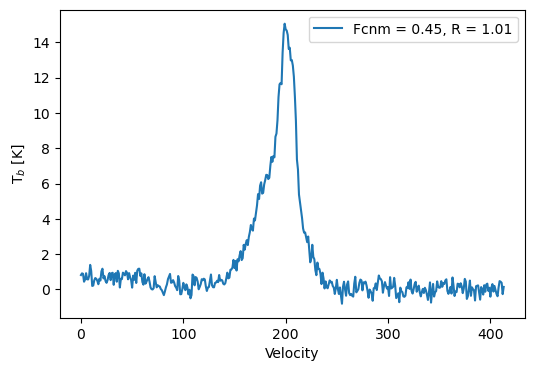

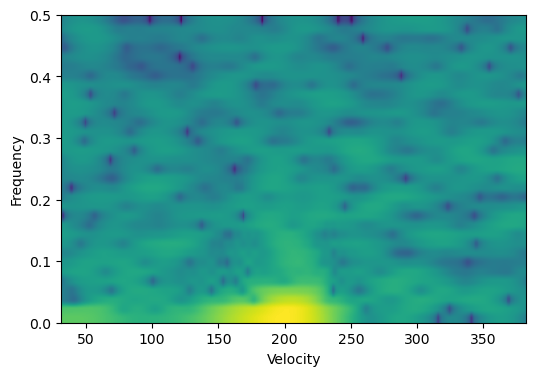

In [14]:
x = X_train[30000, :]

plt.figure(figsize=(6,4))
plt.plot(x, label=f'Fcnm = {round(Y_train[20000,0], 2)}, R = {round(Y_train[0,1], 2)}')
plt.xlabel('Velocity')
plt.ylabel('T$_b$ [K]')
plt.legend()
#plt.axis('off')

plt.figure(figsize=(6,4))
plt.xlabel("Velocity")
plt.ylabel("Frequency")
ws = 64
spectrum, freqs,t,im = plt.specgram(x, Fs=1, NFFT = ws, noverlap=ws-1)
print(spectrum.shape)
torch_tensor = torch.from_numpy(spectrum)
#plt.show(10*np.log10(torch_tensor))
plt.show()
plt.show()